# Heart Disease Prediction

in this project i will use Machine Learning to make predictions on whether a person is suffering from Heart Disease or not specifically classification Algorithm

# import Modules

first let's import the libraries which i will use in the project such as `numpy` and `pandas` to start with. i will use `pyplot` subpackage of `matplotlib` to make visualization. for machine learning , i will use `sklearn` library.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

## Import dataset

Now that we have all the libraries we will need, I can import the dataset and take a look at it. The dataset is stored in the file `dataset.csv`. I'll use the pandas `read_csv` method to read the dataset.

In [41]:
df = pd.read_csv('dataset.csv')

In [42]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [44]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The scale of each feature column is different and quite varied as well. While the maximum for `age` reaches 77, the maximum of `chol` (serum cholestoral) is 564.

# Visualization

It's always a good practice to work with a dataset where the target classes are of approximately equal size. Thus, let's check for the same.

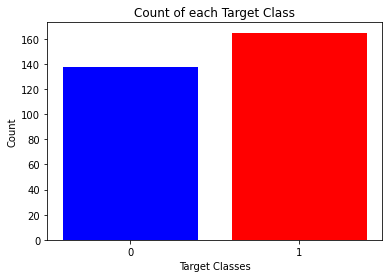

In [45]:
# check for the dataset ratio  
rcParams['figure.figsize'] = 6,4
plt.bar(df['target'].unique(), df['target'].value_counts(), color = ['red', 'blue'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class');

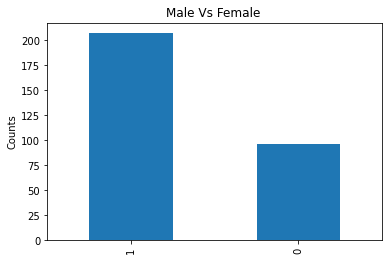

In [46]:
# Explore Male and Female Values 
plt.title('Male Vs Female ')
plt.ylabel('Counts')
df.sex.value_counts().plot(kind='bar') ; 

according to the figure above<br>
Male gender is the most aboard the ship

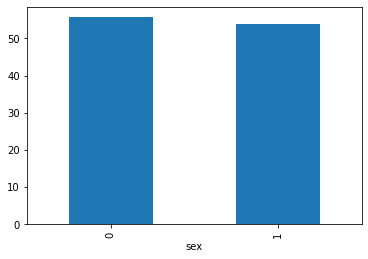

In [47]:
# groub sex column with age column and plot bar
df.groupby(['sex']).mean().age.plot(kind='bar') ;

the two classes are not exactly the same but the ratio is good enough to use this data 

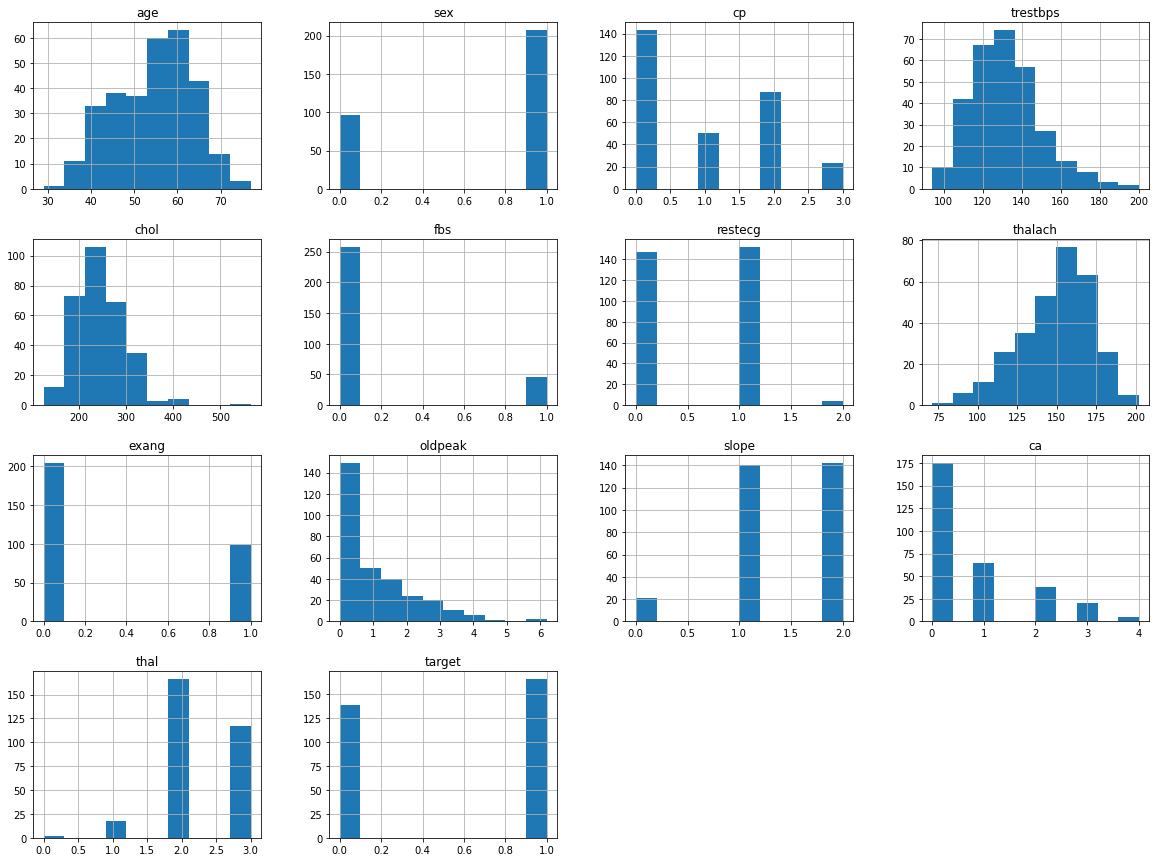

In [48]:
# histogram for all the figures
df.hist(figsize=(20,15));

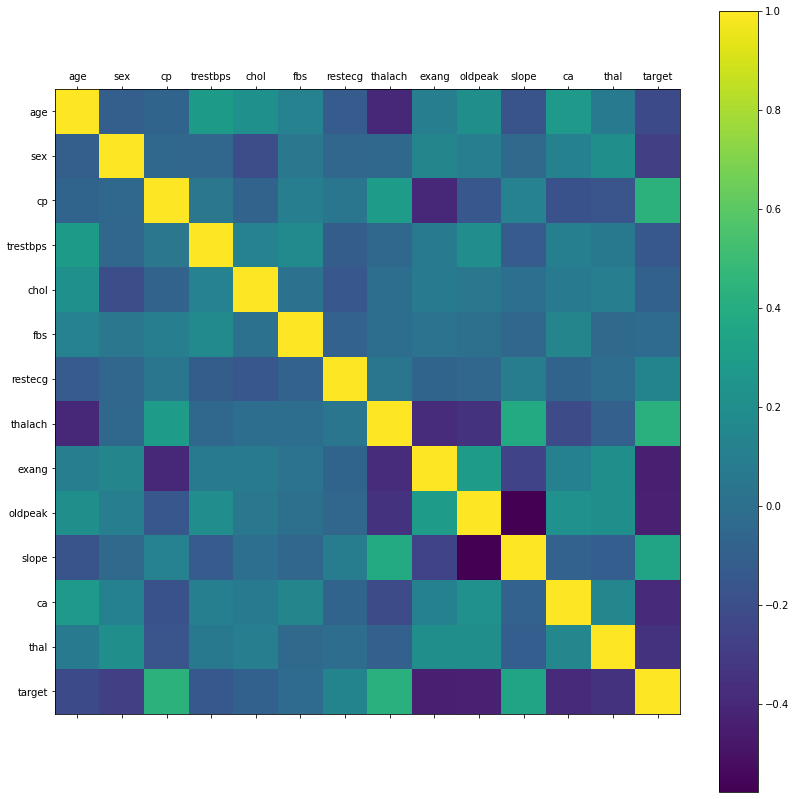

In [49]:
rcParams['figure.figsize'] = 14, 14
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar();

Taking a look at the correlation matrix above, it's easy to see that a few features have negative correlation with the target value while some have positive.

### Data Processing

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models.

First, I'll use the `get_dummies` method to create dummy columns for categorical variables.

In [50]:
df=pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [51]:
# Scale the dataset values 
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

### Machine Learning

I'll now import `train_test_split` to split our dataset into training and testing datasets. Then, I'll import all Machine Learning models I'll be using to train and test the data.

In [52]:
from sklearn.model_selection import train_test_split
y = df['target']
X = df.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Logistic Regrssion

In [53]:
# import logistic regression
from sklearn.linear_model import LogisticRegression
# take instance 
logistic = LogisticRegression (random_state=0,max_iter=2000,penalty='l2',C=0.6,solver='liblinear')

### Train

In [55]:
# fit the model
logistic.fit(X_train , y_train)

LogisticRegression(C=0.6, max_iter=2000, random_state=0, solver='liblinear')

In [56]:
# print the parameters 
logistic.coef_

array([[ 0.22927263, -0.25912071, -0.22732338,  0.39439552, -0.60555249,
         0.59560123, -0.63697808, -0.88751637, -0.02840731,  0.46125982,
         0.41328701,  0.10504892, -0.14642577, -0.07376056,  0.14349514,
        -0.11111143,  0.25415923, -0.29553608,  0.03152718, -0.26615524,
         0.19325122,  1.18142464, -0.29438205, -0.60399086, -0.68006826,
         0.35563968, -0.14721726,  0.08850499,  0.72854504, -0.71120962]])

### Test 

In [57]:
# import accuracy score from sikit learn library
from sklearn.metrics import accuracy_score
#test Data
accuracy_score(y_test , logistic.predict(X_test))

0.8461538461538461

Test gives 84 % accuracy Score

### Random Forest

In [74]:
# try to use Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 50, random_state = 0)

### Train

In [75]:
# fit the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=0)

### Test

In [76]:
rf_classifier.score(X_test, y_test)

0.8571428571428571

Test gives 85 %  Score

### K-Nearest Neighbors

In [77]:
# try to use K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 8)

### Train

In [78]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

### Test

In [79]:
knn_classifier.score(X_test, y_test)

0.8791208791208791

Test gives 87 % Score

### Conclusion

In this project, I used Machine Learning to predict whether a person is suffering from a heart disease. After importing the data, I analysed it using plots. Then, I did generated dummy variables for categorical features and scaled other features. 
I then applied four Machine Learning algorithms, `Logistic Regression`, `Decision Tree Classifier` and `K Neighbors Classifier`. I varied parameters across each model to improve their scores.
In the end, `K Neighbors Classifier` achieved the highest score of `87%` with `8 nearest neighbors`.